<a href="https://colab.research.google.com/github/cyber-noob/My-ML-Projects/blob/master/wine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Related Links:

1. Dataset:
https://drive.google.com/drive/folders/1dn-Nv1OoxToC7TDKPD2wSCQiE8-bUY5r?usp=sharing

2. Feature Engineering:
https://colab.research.google.com/drive/17pzF888MH0Ub9e5L2pikMqOsN6Udcz_r?usp=sharing


In [1]:
!pip install contractions

     |████████████████████████████████| 317kB 4.1MB/s 
     |████████████████████████████████| 245kB 47.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81698 sha256=d732abe9405aedd89688e888f376aff8428e4a81088c324c9efb5cf2f7c624db
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [2]:
import tqdm
import pickle
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten, Embedding, MaxPooling1D, LSTM, InputLayer
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
temp = pd.read_pickle('/content/drive/My Drive/kaggle/wine_shop/temp.pkl')
pd.set_option('display.max_colwidth',1000)
temp.reset_index(drop = True, inplace = True)
del temp['winery']
temp.head()

,country,points,price,province,variety,text
0,Australia,83,10.0,Australia Other,Chardonnay,classic chardonnay aromas apple pear hay lead palate marked decent intensity also bit sweetness orange candy notes run rather short finish andrew peace two thousand and seven peace family vineyard chardonnay south eastern australia
1,US,89,15.0,Washington,Red Blend,wine near equal parts syrah merlot balance cabernet sauvignon aromas blue fruit vanilla cherry herb lead fullbodied pitfruit flavors bring sense deliciousness hard resist north northwest two thousand and fourteen red columbia valley wa
2,Italy,94,80.0,Piedmont,Nebbiolo,barolo conca opens inky dark concentration soothing aromas black fruit spice cola plum prune dried lavender buds nose presents ethereal delicate aromas mouth delivers thicker flavors chocolate mocha drink two thousand and eighteen renato ratti two thousand and seven conca barolo
3,France,87,22.0,Southwest France,Bordeaux-style White Blend,impressive small addition sauvignon gris muscadelle sauvignonsemillon blendit turns exotic wine spice lychee flavors domaine lancienne cure two thousand and ten labbaye white bergerac sec
4,France,88,33.0,France Other,Malbec,ripe sweet wine rich full dried fresh fruit flavors spicy touch spirit palate well bold blackplum fruit dense tannins sweet aftertaste drink two thousand and seventeen chateau du cedre two thousand and twelve le cedre vintage malbec vin de liqueur


## TF-IDF VECTORIZER:


> In order to extract features from our text column we shall be using a technique called TF-IDF **[Term Frequency - Inverse Document Frequency]** Vectorizing. This invloves two components

  * **Term Frequency:** This summarizes how often a given word appears within a document.
  * **Inverse Document Frequency:** This downscales words that appear a lot across documents.

This technique is chosen due to the fact that simple count vectorizer counts the number of times a word occurs in a document but words like "the" occurs more frequently than one can imagine in a document, yet it contains not much information to the model. Hence these frequencies are encoded in a reverse order.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
cv=TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
#transformed train reviews
cv_text=cv.fit_transform(temp.text)


print('BOW_cv_text:',cv_text.shape)

BOW_cv_text: (77057, 50503)


In [6]:
temp.nunique()

country        38
points         21
price         351
province      351
variety        28
text        72327
dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#Scaling the numerical columns to the range of (0-1)
scaler = MinMaxScaler()
temp[['points','price']] = scaler.fit_transform(temp[['points','price']])

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
#One Hot Encoding categorical Features
le = OneHotEncoder(handle_unknown = 'ignore')
enc = le.fit_transform(temp[['country','province']])
enc.shape

(77057, 389)

In [11]:
Y = temp['variety']
import scipy.sparse as sp
X = sp.hstack((cv_text,enc,temp[['points','price']].values))
X.shape

(77057, 50894)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X , Y, stratify = Y) #We stratify on Y to equally distribute categorical features into train and test

**Random Forest Classifier Model**

In [13]:
%%time
rf = RandomForestClassifier( class_weight= 'balanced', n_jobs = -1)
rf.fit(x_train,y_train)

CPU times: user 6min 29s, sys: 2.03 s, total: 6min 31s
Wall time: 1min 39s


In [0]:
pred = rf.predict(x_test)

In [0]:
def confusion(actual,predicted):
  results = confusion_matrix(actual, predicted) 
  
  print ('Confusion Matrix :')
  print(results) 
  print ('Accuracy Score :',accuracy_score(actual, predicted) )
  print ('Report : ')
  print (classification_report(actual, predicted) )
  return results

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=14):
  df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
  fig = plt.figure(figsize=(15,15))
  try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return fig

In [17]:
res = confusion(y_test,pred)

Confusion Matrix :
[[ 850    0    2   66    0    0    0    0    0    1    4    0    0    0
     6    0    0  130    0    0    0    0    0    0    1    0    0    0]
 [  22  107    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    7    0    0    0    1    0]
 [   5    0  198   32    0    1    0    0    0    1    0    0    0    0
     8    0    0    7    0    0    2    0    5    3    0    0    0    1]
 [   8    0    0 1850    0    0    0    0    0    0    0    0    0    0
     0    4    0    9    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  213   11    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    1    0    0   17    0    0    0    0]
 [   0    0    0    0   11 2175    3    0    0    0    0    0    1    0
     4    0    0    0    0    1    0    0    3   13    0    0    3    0]
 [   0    0    0    0    0    0  160    0    0    0    0    0    0    0
     4    0    0    0    0    0    1   

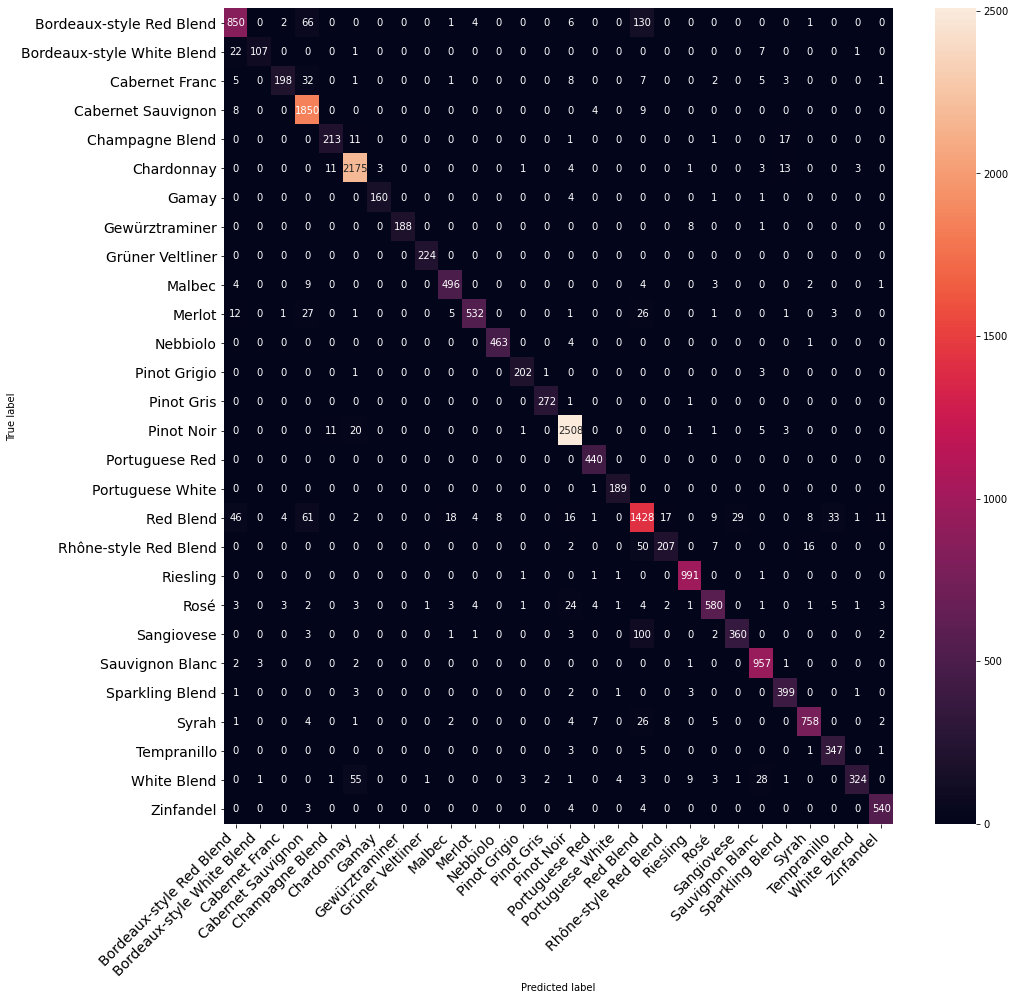

In [18]:
print_confusion_matrix(res, np.unique(Y));



> **Observed Validation Accuracy: 93%** 



**XGBOOST**

In [0]:
import xgboost as xgb

In [0]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()

In [21]:
%%time
clf.fit(x_train,y_train)

CPU times: user 9min 33s, sys: 239 ms, total: 9min 34s
Wall time: 9min 34s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred = clf.predict(x_test)

In [23]:
res = confusion(y_test,pred)

Confusion Matrix :
[[ 889    0    4   15    0    0    0    0    0    2    9    0    0    0
     0    0    0  138    0    0    3    0    0    0    0    0    0    0]
 [  14  114    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    4    0    0    0    6    0]
 [   1    0  253    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2    0    0    0    0    1]
 [  13    0    1 1843    0    0    0    0    0    0    0    0    1    0
     0    0    0   12    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0  220    9    0    0    0    0    0    0    0    0
     3    0    0    0    0    0    2    0    0    7    0    0    2    0]
 [   0    0    0    1    1 2201    2    0    0    0    0    0    1    0
     4    0    0    0    0    0    0    0    1    3    0    0    0    0]
 [   0    0    0    0    0    0  164    0    0    0    0    0    0    0
     1    0    0    0    0    0    1   

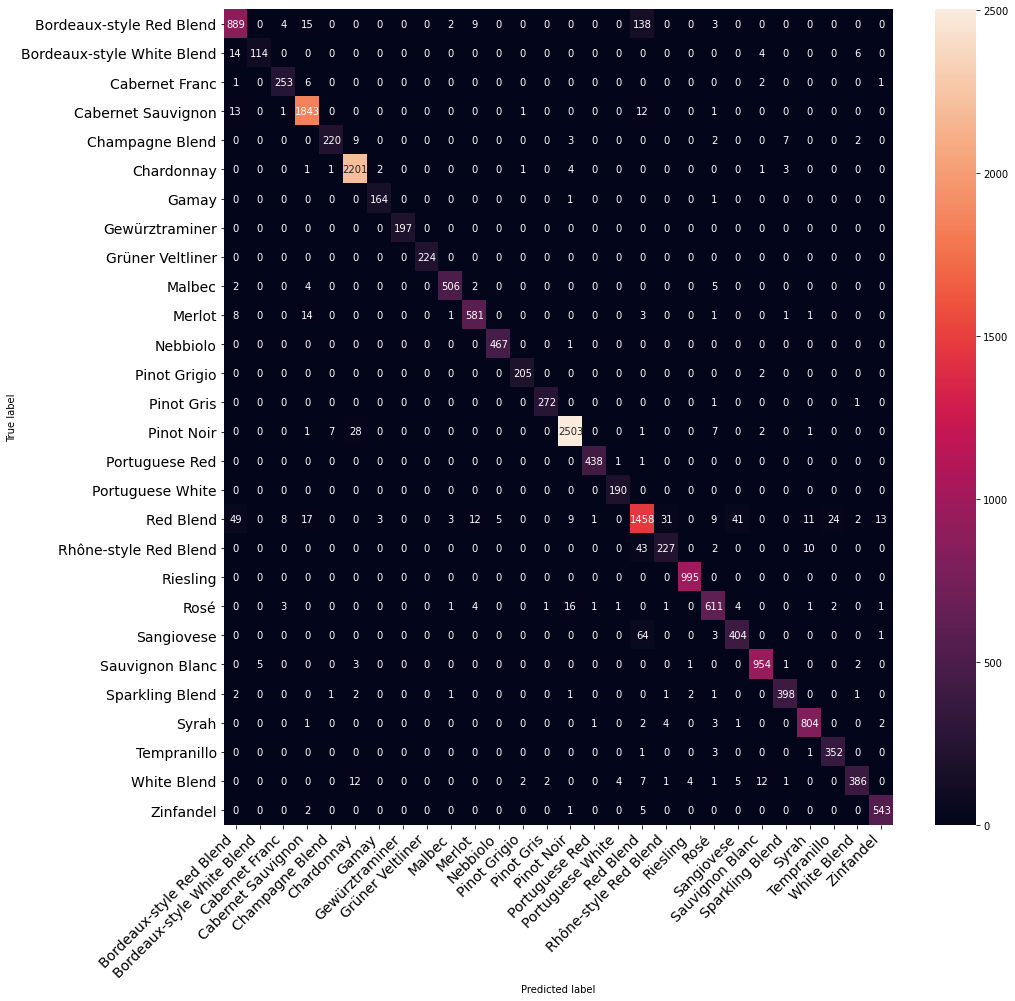

In [24]:
print_confusion_matrix(res, np.unique(Y));



> **Observed Validation Accuracy: 96%**



#END Notes:


> We used two models **Random Forest** and **XG Boost** and both gave the same accuracy score of 93% with a promising confusion matrix.


> Our Accuracy can be further improved by using a better encoding techniques for the text document such as **Elmo** or **Universal Sentence Encoders (USE)**.


> **Oversampling** and **Undersampling** all the categorical features to boost the learning of the model on categorical features containing very little saamples.





